# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison

In [3]:
original_res = pd.read_parquet('entire_results_original.parquet')
attn_res = pd.read_parquet('entire_results_attention.parquet')

In [4]:
print("Original hits:")
print(original_res['hit'].sum())
print("Original accuracy:")
print(original_res['hit'].mean())

Original hits:
812
Original accuracy:
0.9818621523579202


In [5]:
print("Attention hits:")
print(attn_res['hit'].sum())
print("Attention accuracy:")
print(attn_res['hit'].mean())

Attention hits:
812
Attention accuracy:
0.9818621523579202


In [6]:
attn_res['true_prob_diff'] = attn_res['true_prob'] - original_res['true_prob']

In [7]:
print(f'Difference in probabilities for true label:')
print('Mean:')
print(attn_res['true_prob_diff'].mean())
print('Max:')
print(attn_res['true_prob_diff'].max())
print('Min:')
print(attn_res['true_prob_diff'].min())
print("Count of abs. larger than 0.1:")
print((attn_res['true_prob_diff'].abs() > 0.1).sum())

Difference in probabilities for true label:
Mean:
0.0
Max:
0.0
Min:
0.0
Count of abs. larger than 0.1:
0


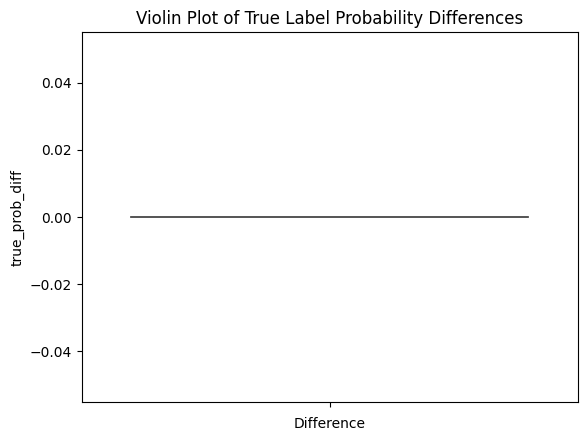

In [8]:
sns.violinplot(data=attn_res['true_prob_diff'])
plt.title('Violin Plot of True Label Probability Differences')
plt.xlabel('Difference')
plt.show()

In [9]:
attn_res['pred_prob_diff'] = attn_res['max_prob'] - original_res['max_prob']

In [10]:
print(f'Difference in probabilities for false label:')
print('Mean:')
print(attn_res['pred_prob_diff'].mean())
print('Max:')
print(attn_res['pred_prob_diff'].max())
print('Min:')
print(attn_res['pred_prob_diff'].min())
print("Count of abs. larger than 0.1:")
print((attn_res['pred_prob_diff'].abs() > 0.1).sum())

Difference in probabilities for false label:
Mean:
0.0
Max:
0.0
Min:
0.0
Count of abs. larger than 0.1:
0


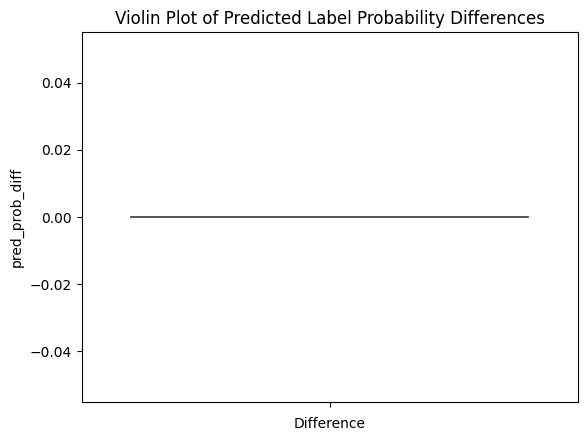

In [11]:
sns.violinplot(data=attn_res['pred_prob_diff'])
plt.title('Violin Plot of Predicted Label Probability Differences')
plt.xlabel('Difference')
plt.show()

In [12]:
print("Mismatch in hits count:")
print((attn_res['hit'] ^ original_res['hit']).sum())

Mismatch in hits count:
0


In [13]:
print("Mismatch total count:")
print((attn_res['pred'] != original_res['pred']).sum())

Mismatch total count:
0
